Step 1: Import Libraries
Start by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Step 2: Load The Data
Load your customer churn dataset using Pandas 

In [2]:
data=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Step 3:Data Pre-processing
Pre-process the Total Charges Feature

In [6]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [7]:
categorial_var=list(data.dtypes.loc[data.dtypes=='object'].index)
categorial_var

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [8]:
categorial_var.remove('customerID')

Step 4:Exploratory Data Analysis (EDA)
The EDA process will comprise of Univariate and Multivariate Analysis alomg with abundant Visualisations

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  311.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

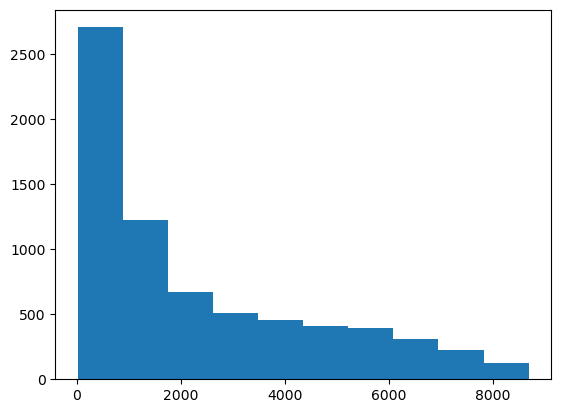

In [9]:
plt.hist(data['TotalCharges'])

<Axes: xlabel='Churn', ylabel='count'>

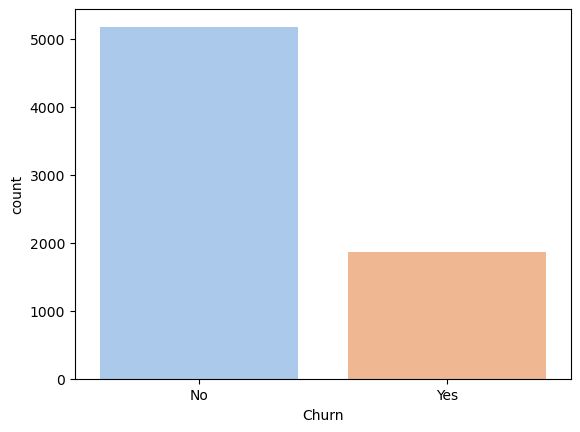

In [10]:
sns.countplot(x='Churn',data=data,palette='pastel')

<Axes: xlabel='tenure', ylabel='Churn'>

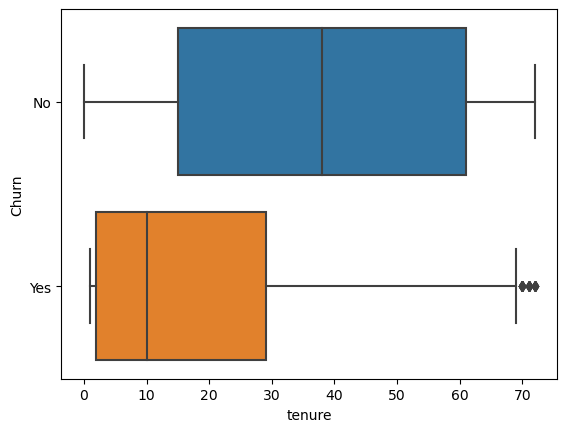

In [11]:
sns.boxplot(x='tenure',y='Churn',data=data)

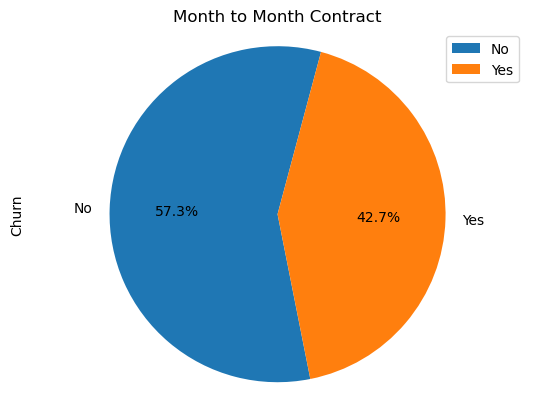

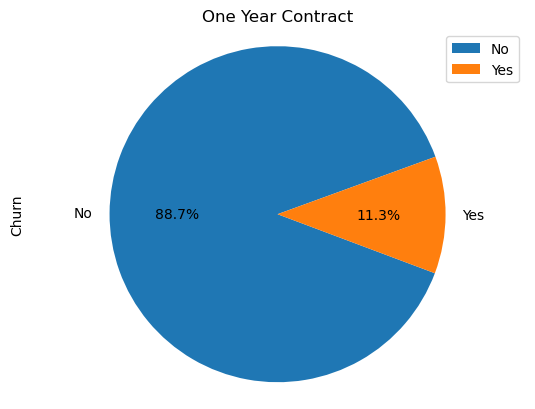

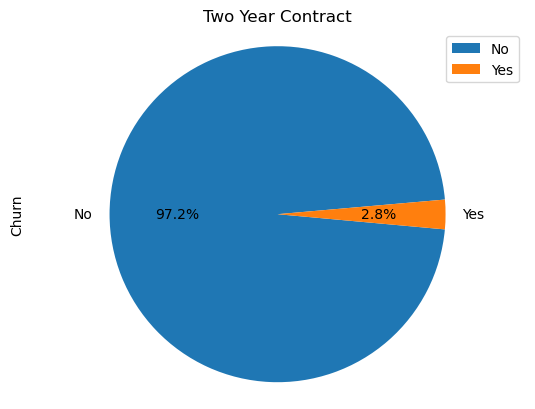

In [12]:
pie_Contract_m2m = pd.DataFrame(data[data['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.axis('equal')
plt.title('Month to Month Contract')

pie_Contract_1y = pd.DataFrame(data[data['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.axis('equal')
plt.title('One Year Contract')

pie_Contract_2y = pd.DataFrame(data[data['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.axis('equal')
plt.title('Two Year Contract')
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

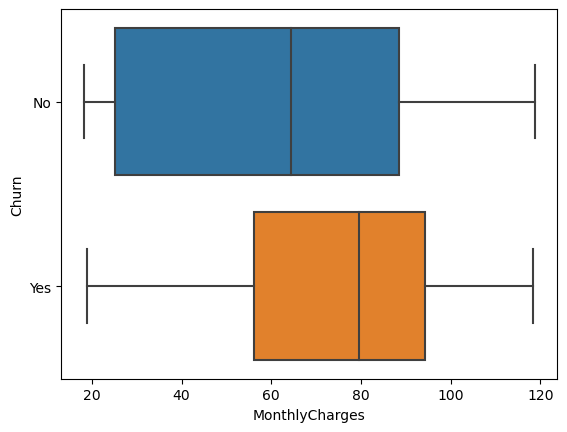

In [13]:
sns.boxplot(x='MonthlyCharges',y='Churn',data=data)

<Axes: xlabel='TotalCharges', ylabel='Churn'>

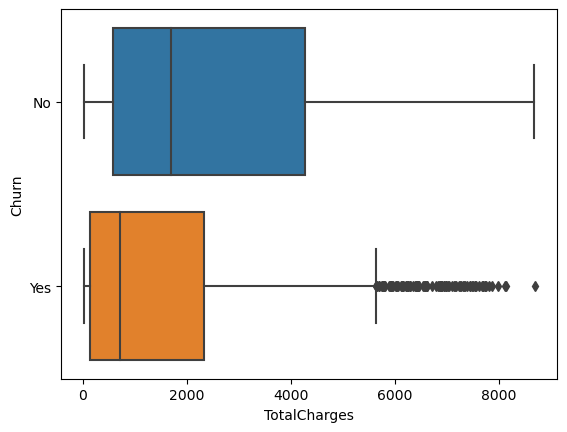

In [14]:
sns.boxplot(x='TotalCharges',y='Churn',data=data)

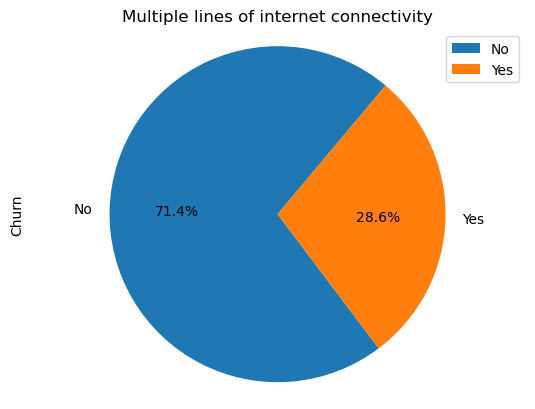

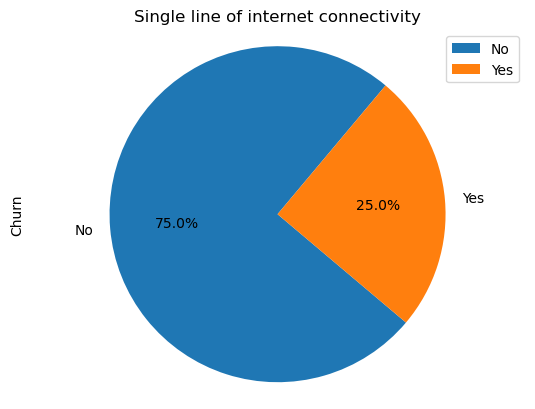

In [15]:
pie_MultipleLines_Y = pd.DataFrame(data[data['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.axis('equal')

pie_MultipleLines_N = pd.DataFrame(data[data['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Single line of internet connectivity')
plt.axis('equal')
plt.show()

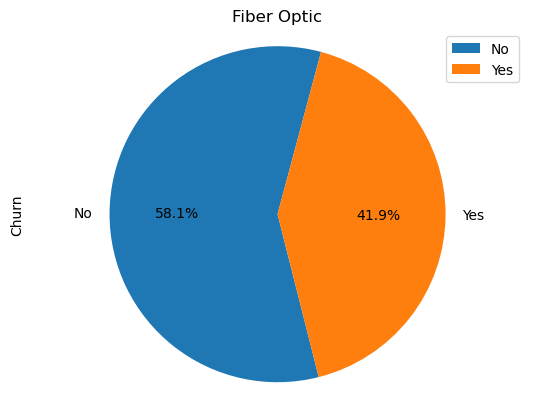

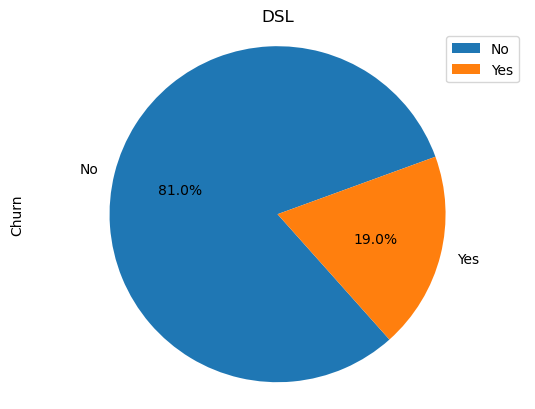

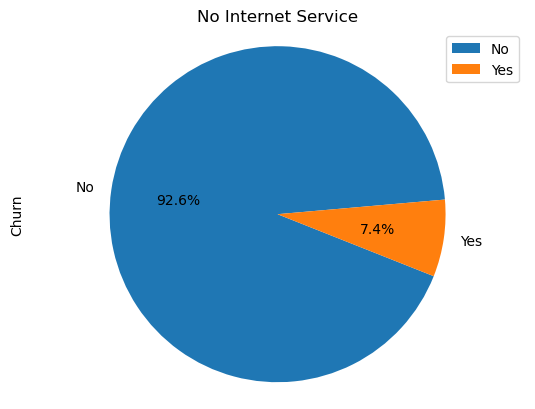

In [16]:
pie_InternetService_fo = pd.DataFrame(data[data['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.axis('equal')

pie_InternetService_dsl = pd.DataFrame(data[data['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('DSL')
plt.axis('equal')

pie_InternetService_no = pd.DataFrame(data[data['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('No Internet Service')
plt.axis('equal')
plt.show()

In [17]:
categorial_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Step 5: Data Preprocessing and Feature Engineering
Based on the insights from EDA, perform data preprocessing and feature engineering to prepare the data for Logistic Regression.

In [18]:
# label_encoder object knows how to understand word labels
# Encode labels in column
label=LabelEncoder()
data['Partner_n']=label.fit_transform(data['Partner'])
data['Dependents_n']=label.fit_transform(data['Dependents'])
data['MultipleLines_n']=label.fit_transform(data['MultipleLines'])
data['InternetService_n']=label.fit_transform(data['InternetService'])
data['OnlineSecurity_n']=label.fit_transform(data['OnlineSecurity'])
data['OnlineBackup_n']=label.fit_transform(data['OnlineBackup'])
data['DeviceProtection_n']=label.fit_transform(data['DeviceProtection'])
data['TechSupport_n']=label.fit_transform(data['TechSupport'])
data['StreamingTV_n']=label.fit_transform(data['StreamingTV'])
data['StreamingMovies_n']=label.fit_transform(data['StreamingMovies'])
data['Contract_n']=label.fit_transform(data['Contract'])
data['PaperlessBilling_n']=label.fit_transform(data['PaperlessBilling'])
data['PaymentMethod_n']=label.fit_transform(data['PaymentMethod'])
data['Churn_n']=label.fit_transform(data['Churn'])
data_n=data.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],axis=1)
data_n

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_n,Dependents_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
0,7590-VHVEG,0,1,29.85,29.85,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,2234-XADUH,0,72,103.20,7362.90,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,4801-JZAZL,0,11,29.60,346.45,1,1,1,0,2,0,0,0,0,0,0,1,2,0
7041,8361-LTMKD,1,4,74.40,306.60,1,0,2,1,0,0,0,0,0,0,0,1,3,1


In [19]:
data_n=data_n.drop(['customerID'],axis=1)

In [20]:
data_n.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_n,Dependents_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
0,0,1,29.85,29.85,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,0,0,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,0,0,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,1,2,1


In [21]:
# Check for null values in the entire dataset
data_n.isnull().any().any()

True

In [22]:
# If you want to get the count of null values in each column, you can use the sum() method
data_n.isnull().sum()

SeniorCitizen          0
tenure                 0
MonthlyCharges         0
TotalCharges          10
Partner_n              0
Dependents_n           0
MultipleLines_n        0
InternetService_n      0
OnlineSecurity_n       0
OnlineBackup_n         0
DeviceProtection_n     0
TechSupport_n          0
StreamingTV_n          0
StreamingMovies_n      0
Contract_n             0
PaperlessBilling_n     0
PaymentMethod_n        0
Churn_n                0
dtype: int64

Handling null values

Fill with Mean/Median/Mode: 
    For numerical features, you can fill the null values with the mean, median, or mode of that feature. This approach helps retain the data while minimizing the impact of missing values.

In [23]:
# Fill null values in a numerical column with mean
data_n['TotalCharges'].fillna(data_n['TotalCharges'].mean(), inplace=True)

Feature Scaling

Standardization:
    Standard Scaling, also known as Z-score normalization or standardization, is a data preprocessing technique used to scale numerical features to have a mean of 0 and a standard deviation of 1. This process ensures that all features are on the same scale and removes the effect of the original scale on the data.

In [24]:
# Create a StandardScaler object
scaler=StandardScaler()

In [25]:
# Fit and transform the data
scale=scaler.fit_transform(data_n)
x=data_n.drop(['Churn_n'],axis=1)
y=data_n['Churn_n']
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_n,Dependents_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n
0,0,1,29.85,29.85,1,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,0,0,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,0,0,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,103.20,7362.90,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,29.60,346.45,1,1,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,74.40,306.60,1,0,2,1,0,0,0,0,0,0,0,1,3


In [26]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Step 6: Create and Train the Logistic Regression Model
Create a Logistic Regression model using scikit-learn's LogisticRegression class.

In [27]:
# Create the Logistic Regression model
model=LogisticRegression(max_iter=1000)
# Train the model on the training data
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Step 7: Make Predictions
Use the trained model to make predictions on the test data.

In [28]:
y_pred=model.predict(x_test)

Step 8: Evaluate Model Performance
Assess the model's performance using evaluation metrics like accuracy, precision, recall, F1-score, and confusion matrix.

In [29]:
# Calculate evaluation metrics
accuracy=accuracy_score(y_pred,y_test)
report=classification_report(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
print('Accuracy Score=',accuracy)
print('Classification Report=',report)
print('Confusion Matrix=',conf_matrix)

Accuracy Score= 0.8112136266855926
Classification Report=               precision    recall  f1-score   support

           0       0.90      0.85      0.88      1094
           1       0.57      0.67      0.61       315

    accuracy                           0.81      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.82      0.81      0.82      1409

Confusion Matrix= [[932 162]
 [104 211]]


Step 9: Visualize Model Performance
Visualize the model's performance using a confusion matrix or other appropriate plots.

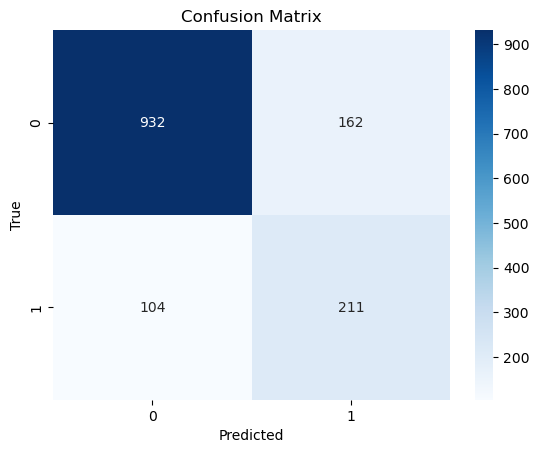

In [30]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()